In [22]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [23]:
def entropy(probabilities):
    return -sum(p * np.log2(p) for p in probabilities if p > 0)

In [24]:
def gain(total_entropy, subsets, total_instances):
    weighted_entropy = sum((len(subset) / total_instances) * entropy([sum(subset)/len(subset), 1 - sum(subset)/len(subset)]) for subset in subsets)
    return total_entropy - weighted_entropy

In [25]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"],
}

In [26]:
df = pd.DataFrame(data)

In [27]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes
5,Rain,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rain,Mild,Normal,False,Yes


In [28]:
total_yes = len(df[df["Play"] == "Yes"])
total_no = len(df[df["Play"] == "No"])
total_entropy = entropy([total_yes / len(df), total_no / len(df)])
print(f"Entropy Total: {total_entropy:.4f}")

Entropy Total: 0.9403


In [29]:
gain_outlook = gain(total_entropy, [
    [0, 0, 1, 1, 0],  # Sunny
    [1, 1, 1, 1],     # Overcast
    [1, 0, 1, 1, 0],  # Rain
], len(df))
print(f"Gain (Outlook): {gain_outlook:.4f}")

gain_humidity = gain(total_entropy, [
    [0, 0, 1, 1, 0, 0, 0],  # High
    [1, 1, 1, 1, 1, 1, 1],  # Normal
], len(df))
print(f"Gain (Humidity): {gain_humidity:.4f}")

gain_temperature = gain(total_entropy, [
    [0, 0, 1, 0],  # Hot
    [1, 1, 0, 1, 1, 1],  # Mild
    [1, 1, 1, 1],  # Cool
], len(df))
print(f"Gain (Temperature): {gain_temperature:.4f}")

gain_windy = gain(total_entropy, [
    [1, 1, 1, 1, 1, 1, 1, 1],  # Not Windy
    [0, 0, 0, 0, 0, 0],        # Windy
], len(df))
print(f"Gain (Windy): {gain_windy:.4f}")

Gain (Outlook): 0.2467
Gain (Humidity): 0.5087
Gain (Temperature): 0.4299
Gain (Windy): 0.9403


In [30]:
df_encoded = pd.get_dummies(df, columns=["Outlook", "Temperature", "Humidity", "Windy"])
X = df_encoded.drop(columns=["Play"])
y = df["Play"]

model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

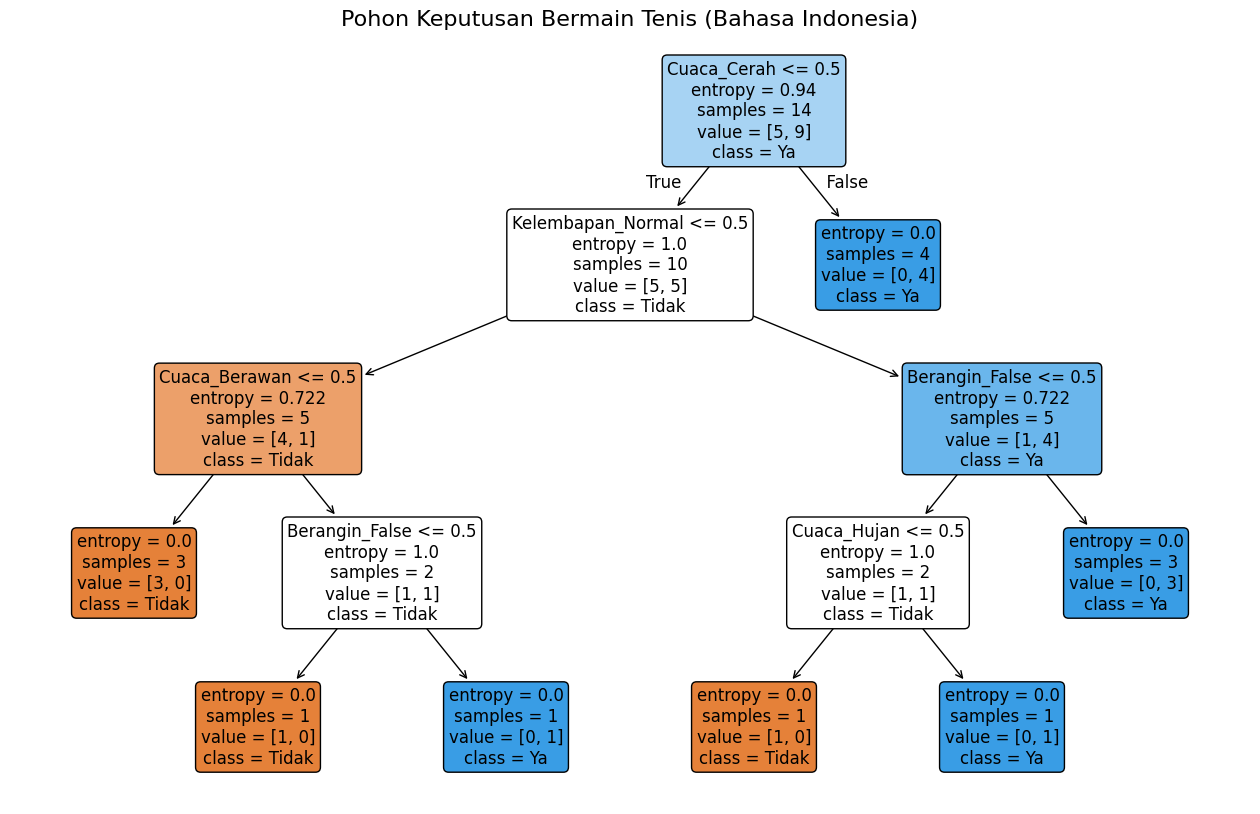

In [31]:
plt.figure(figsize=(16, 10))
plot_tree(
    model,
    feature_names=[
        "Cuaca_Cerah", "Cuaca_Berawan", "Cuaca_Hujan",
        "Suhu_Panas", "Suhu_Sejuk", "Suhu_Dingin",
        "Kelembapan_Tinggi", "Kelembapan_Normal",
        "Berangin_False", "Berangin_True"
    ],
    class_names=["Tidak", "Ya"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Pohon Keputusan Bermain Tenis (Bahasa Indonesia)", fontsize=16)
plt.show()
